# Digital Image Filters (in Practice)

## Introduction to Image Processing Using Python

_Authors: Mikołaj Leszczuk, Zbigniew Hulicki, Jakub Nawała_

[http://qoe.agh.edu.pl](http://qoe.agh.edu.pl)

## Theoretical Fundamentals

Digital filters are a central part of many signal processing systems. Image filtering is a mathematical operation on pixels of the source image, which results in a new, transformed image being produced. Its primary usage is to extract properties of the input image. Those are usually used in further processing steps. 

We can perform filtration in a spatial domain or the frequency domain. In the first case, a convolution operation between a matrix (called “kernel”) and the input image is applied (for the sake of correctness, we are using a discrete convolution, where both operands have a finite number of points). In the second case, a frequency domain representation of the input image is multiplied with a given filter characteristic. The filtering effect depends on the size and type of filter. 

We can distinguish two (2) general types of frequency domain filters:

1. A low-pass filter – used for the removal of picture elements being a part of high-frequency spatial features (such as large colour differences between adjacent pixels), while leaving low-frequency features (e.g. large shapes without details) intact. Most of the noise present in images is contained in spatial characteristics of high frequency. Thus, such a low-pass filter may be used to compensate for this.

2. A high-pass filter – acts in a manner opposite to the low pass filter. It attenuates low-frequency features while reinforcing high-frequency ones. This behaviour highlights picture elements of high spatial frequency by increasing their visibility (e.g. brightness or colour). In practice, this corresponds to the emphasis of sharp edges of objects.

If it comes to spatial domain filters, those may be divided into linear and nonlinear. For linear filters, a kernel defines a type. By choosing the size and values of its cells, we may achieve various effects. For example, one can smooth (see figure showing an exemplary kernel of the mean filter - also called smoothing filter) or sharpen the image. In some more advanced cases, it is also possible to find edges and other more sophisticated features.

| | | |
| -- | -- | -- |
| $$\frac{1}{9}$$ | $$\frac{1}{9}$$ | $$\frac{1}{9}$$ |
| $$\frac{1}{9}$$ | $$\frac{1}{9}$$ | $$\frac{1}{9}$$ |
| $$\frac{1}{9}$$ | $$\frac{1}{9}$$ | $$\frac{1}{9}$$ |

During the exercises, we are going to test a couple of filters. The following modules: `numpy`, `cv2`, `matplotlib.pyplot` and `skimage` of Python are used for this purpose. To ensure it is properly installed, please enter `pip list` (or `pip3 list`) in the command line. It displays an alphabetical list of installed modules, followed by information about the version. Search through the list and find `numpy`, `cv2`, `matplotlib.pyplot` and `skimage`.

In [ ]:
pip list

For a documentation of the modules, enter `help(<module>)`. To get more specific information about the syntax and exemplary usage, type `help(<module>.<function_name>)` (replace `<module>` and `<function_name>` with a name of the module and the function you want to check).

In [1]:
import numpy as np
# help(np)

In [2]:
import cv2
# help(cv2)

In [3]:
import matplotlib.pyplot as plt
# help(plt)

In [4]:
import skimage
# help(skimage)

## The List of Selected Useful Functions and Their Descriptions

| | |
| :- | :- |
| `a = cv2.imread(filename)`                     | It loads an image to the `a` array. |
| `plt.imshow(a) `                               | It displays an image from the `a` array. |
| `(lines, columns, channels) = a.shape`         | It shows the size of the image `m` (number of `lines`, `columns`, `channels`). |
| `skimage.img_as_ubyte(a1)`                     | It changes the type of a numerical array to `uint8` (8-bit unsigned integer). |
| `a1 = skimage.util.random_noise(a, mode=type)` | It adds noise of a given type to the intensity (meaning single channel) image `a`. Type can take a value from a predefined list. One important example is `s&p` (“salt & pepper”). |
| `b = skimage.filters.rank.median(a)`           | It performs median filtering of the `a` matrix along both dimensions (horizontal and vertical). |
| `plt.title('your title')`                      | It adds the `your title` title to the plot. |
| `b = cv2.filter2D(a, -1, kernel)`              | It returns a filtered version of the grayscale or „true colour” (meaning RGB) input image `a`. |


## Linear Digital Filters in Python

### Sharpen Filter

Now is the time to load the first image and do some actions on it. Please take a look at an exemplary source code below fetching a `meadow.png` image and running the unsharp filter for a reference on how to load the image.

As can be seen, the first filter to be tested is the sharpen filter.

Run the script.

In [ ]:
# Loading image and using sharpen filter
a = cv2.imread('Images/meadow.png')

In [ ]:
kernel = np.array(
    [
        [-1,-1,-1],
        [-1, 9,-1], 
        [-1,-1,-1]
    ]
)
kernel

In [ ]:
np.sum(kernel)

In [ ]:
b = cv2.filter2D(a, -1, kernel)

Your script should show that filtering enhanced the input image.

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

Notice that some image features, such as edges, look sharper. Do you see any artefacts appearing as well? 

What happens if we apply this filter many times?

In [ ]:
c = cv2.filter2D(b, -1, kernel)

In [ ]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

In [ ]:
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB));
plt.title('sharpen 2 times');

Let us rerun the script, but this time use the `car.png` image.

In [ ]:
a = cv2.imread('Images/car.png')
b = cv2.filter2D(a, -1, kernel)

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

Let us do the same with the `black.png` image.

In [ ]:
a = cv2.imread('Images/black.png')
b = cv2.filter2D(a, -1, kernel)

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(b, cv2.COLOR_BGR2RGB));
plt.title('sharpen');

### Image Blurring

Blurring image using normalized box filter (destination image is of same size & type as source image).

```python
cv2.blur(image, ksize[, dst[, anchor[, borderType]]])
```

**Arguments**:

* `image` – input image; having any channels number processed independently
* `ksize` – blurring kernel size
* `anchor` – anchor point; default value `Point(-1,-1)` meaning anchor at kernel centre
* `borderType` – border mode used to extrapolate pixels outside of image

In [ ]:
image = cv2.imread('Images/meadow.png')
blur = cv2.blur(image, (10, 10))
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

### Disk Filter

The second filter to evaluate is the disk filter. It is used to blur images. In practice, it applies the circular averaging filter. Please take a look at an exemplary source code fetching an image and running the disk filter with two radii (1 and 10).

In [ ]:
# Loading image and using radius filter
a = cv2.imread('Images/meadow.png')
radius = 1
a1 = skimage.morphology.disk(radius)
a1

In [ ]:
np.sum(a1)

In [ ]:
a1 = skimage.morphology.disk(radius) / np.sum(skimage.morphology.disk(radius))
a1

In [ ]:
np.sum(a1)

In [ ]:
a2 = cv2.filter2D(a, -1, a1)

In [ ]:
radius = 10
a10 = skimage.morphology.disk(radius)
a10

In [ ]:
a10 = skimage.morphology.disk(radius) / np.sum(skimage.morphology.disk(radius))
a20 = cv2.filter2D(a, -1, a10)

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(a2, cv2.COLOR_BGR2RGB));
plt.title('radius = 1');

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(a20, cv2.COLOR_BGR2RGB));
plt.title('radius = 10');

How does the radius of the filter influence the operation? Let us try to apply the filter with the smaller radius several times and compare it with a single run of the larger radius filter.

In [ ]:
a2x10 = a
for i in range(10):
    a2x10 = cv2.filter2D(a2x10, -1, a1)

In [ ]:
plt.imshow(cv2.cvtColor(a2x10, cv2.COLOR_BGR2RGB));
plt.title('radius = 1 x 10');

In [ ]:
plt.imshow(cv2.cvtColor(a20, cv2.COLOR_BGR2RGB));
plt.title('radius = 10');

### Guided Filter

* A guided filter is an edge-preserving smoothing image filter.
* It can filter out noise or texture while retaining sharp edges.

Applying guided filter to image (destination image is of same size & type as source image).

In [5]:
pip install --upgrade opencv-python opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2

```python
cv2.ximgproc.guidedFilter(guide, src, radius, eps[, dst[, dDepth]])
```

**Arguments**:

* `guide` – guided image (or array of images) with up to 3 channels, if it have more then 3 channels then only first 3 channels will be used.
* `src` – filtering image with any numbers of channels.
* `dst` – output image.
* `radius` – radius of Guided Filter.
* `eps` – regularization term of Guided Filter; larger parameter value meaning farther colours within pixel neighbourhood mixed together, resulting in larger areas of semi-equal colour.
* `dDepth` – optional depth of the output image.

For more details about Guided Filter parameters, see the original article: Kaiming He, Jian Sun, and Xiaoou Tang. Guided image filtering. In *Computer Vision–ECCV 2010*, pages 1–14. Springer, 2010.

In [7]:
image = cv2.imread("Images/meadow.png")
guided = cv2.ximgproc.guidedFilter(image, image, 5, 0.05)

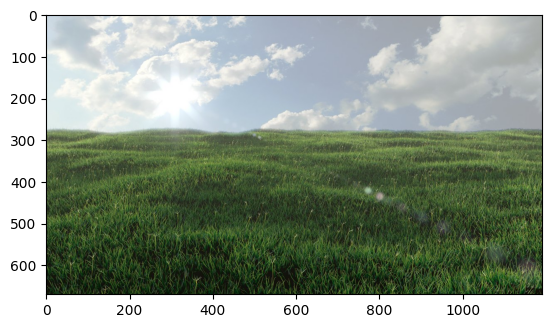

In [8]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

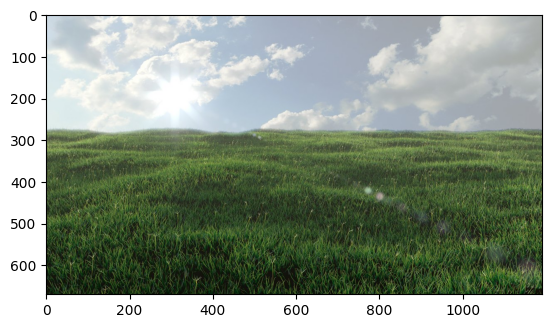

In [9]:
plt.imshow(cv2.cvtColor(guided, cv2.COLOR_BGR2RGB));

## Non-Linear Digital Filters in Python

### Bilateral Image Filtering

* A **bilateral filter** is a non-linear, edge-preserving, and noise-reducing smoothing filter for images.
* As with a guided filter, it can filter out noise or texture while retaining sharp edges.
* It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.
* This weight can be based on a Gaussian distribution.
* Crucially, the weights depend not only on Euclidean distance of pixels, but also on the radiometric differences (e.g., range differences, such as color intensity, depth distance, etc.).
* This preserves sharp edges.

Applying bilateral filter to image (destination image is of same size & type as source image).

```python
cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```

**Arguments**:

* `image` – source 8-bit or floating-point, 1-channel or 3-channel image
* `d` – diameter of each pixel neighbourhood used during filtering; computed from `sigmaSpace` if non-positive
* `sigmaColor` – filter sigma in colour space; the sigma in the color space is similar to ${eps}^2$ into guidedFilter.
* `sigmaSpace` – filter sigma in coordinate space; larger parameter value meaning farther pixels influencing each other if their colours close enough (see `sigmaColor`); specifying neighbourhood size regardless of `sigmaSpace` when `d>0`; otherwise, `d` proportional to `sigmaSpace`

In [10]:
image = cv2.imread('Images/meadow.png')
bilateral = cv2.bilateralFilter(image, 15, 75, 75)

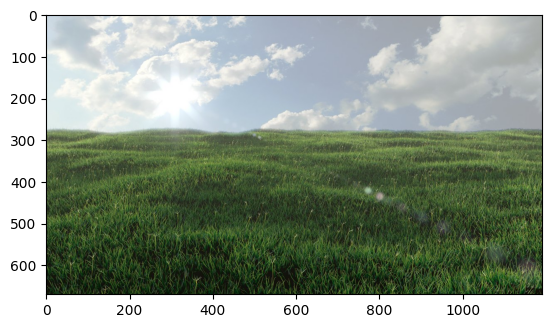

In [11]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));

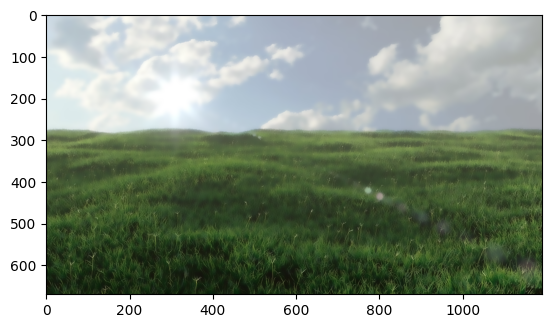

In [12]:
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB));

### Comparison (Guided Filter vs. Bilateral Filter)

Compared to the bilateral filter, the guided image filter has two advantages:
1. Bilateral filters have high computational complexity, while the guided image filter uses simpler calculations with linear computational complexity.
1. Bilateral filters sometimes include unwanted gradient reversal artifacts and cause image distortion. The guided image filter is based on linear combination, making the output image consistent with the gradient direction of the guidance image, preventing gradient reversal.

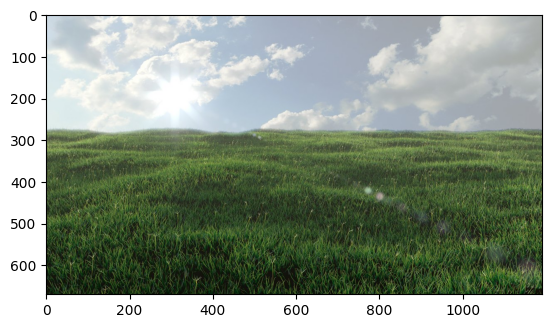

In [13]:
plt.imshow(cv2.cvtColor(guided, cv2.COLOR_BGR2RGB));

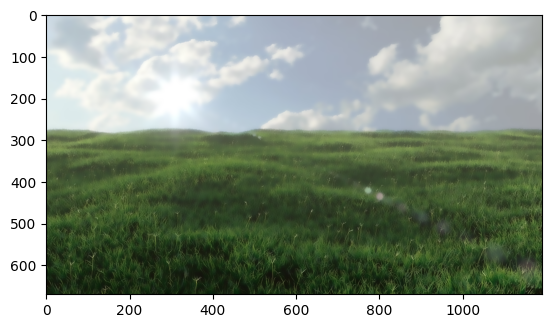

In [14]:
plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB));

### Median Filter

The last test is the median filter. Recall that it is efficient in removing “salt-and-pepper” noise without significantly reducing the sharpness of the image. Please refer to an exemplary source code fetching an image, applying the “salt-and-pepper” noise to it and filtering it using the median filter.

In [ ]:
# Loading image and using noise on image to show how filter works
a = cv2.imread('Images/meadow.png')
noise = skimage.util.random_noise(a, mode='s&p')

In [ ]:
a.dtype

In [ ]:
noise.dtype

In [ ]:
noise = skimage.img_as_ubyte(skimage.util.random_noise(a, mode='s&p'))
noise.dtype

In [ ]:
# We need to use filter for each channel separately
b = skimage.filters.rank.median(noise[:, :, 0])
g = skimage.filters.rank.median(noise[:, :, 1])
r = skimage.filters.rank.median(noise[:, :, 2])

In [ ]:
# We need to reconstruct the image from separated channels
a1 = np.dstack((b, g, r))

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(noise, cv2.COLOR_BGR2RGB));
plt.title('with noise');

In [ ]:
plt.imshow(cv2.cvtColor(a1, cv2.COLOR_BGR2RGB));
plt.title('after median filter');

In [ ]:
plt.imshow(cv2.cvtColor(a, cv2.COLOR_BGR2RGB));
plt.title('original');

In [ ]:
plt.imshow(cv2.cvtColor(a1, cv2.COLOR_BGR2RGB));
plt.title('after median filter');

Do you see how efficient this filter is in removing the “salt-and-pepper” noise? Are there any drawbacks related to this filtration?